In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path=r'C:\Users\admin\Downloads\Stock Market Analysis\individual_stocks_5yr-20220120T142102Z-001\individual_stocks_5yr'
company_list=['AAPL_data.csv','GOOG_data.csv','MSFT_data.csv','AMZN_data.csv']
all_data=pd.DataFrame()
for file in company_list:
    current_df=pd.read_csv(path +'/'+ file)
    all_data=pd.concat([all_data,current_df])
all_data.shape

(4752, 7)

In [4]:
all_data.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [5]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [6]:
all_data['date']=pd.to_datetime(all_data['date'])

In [7]:
all_data.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
Name              object
dtype: object

In [8]:
tech_list=all_data['Name'].unique()

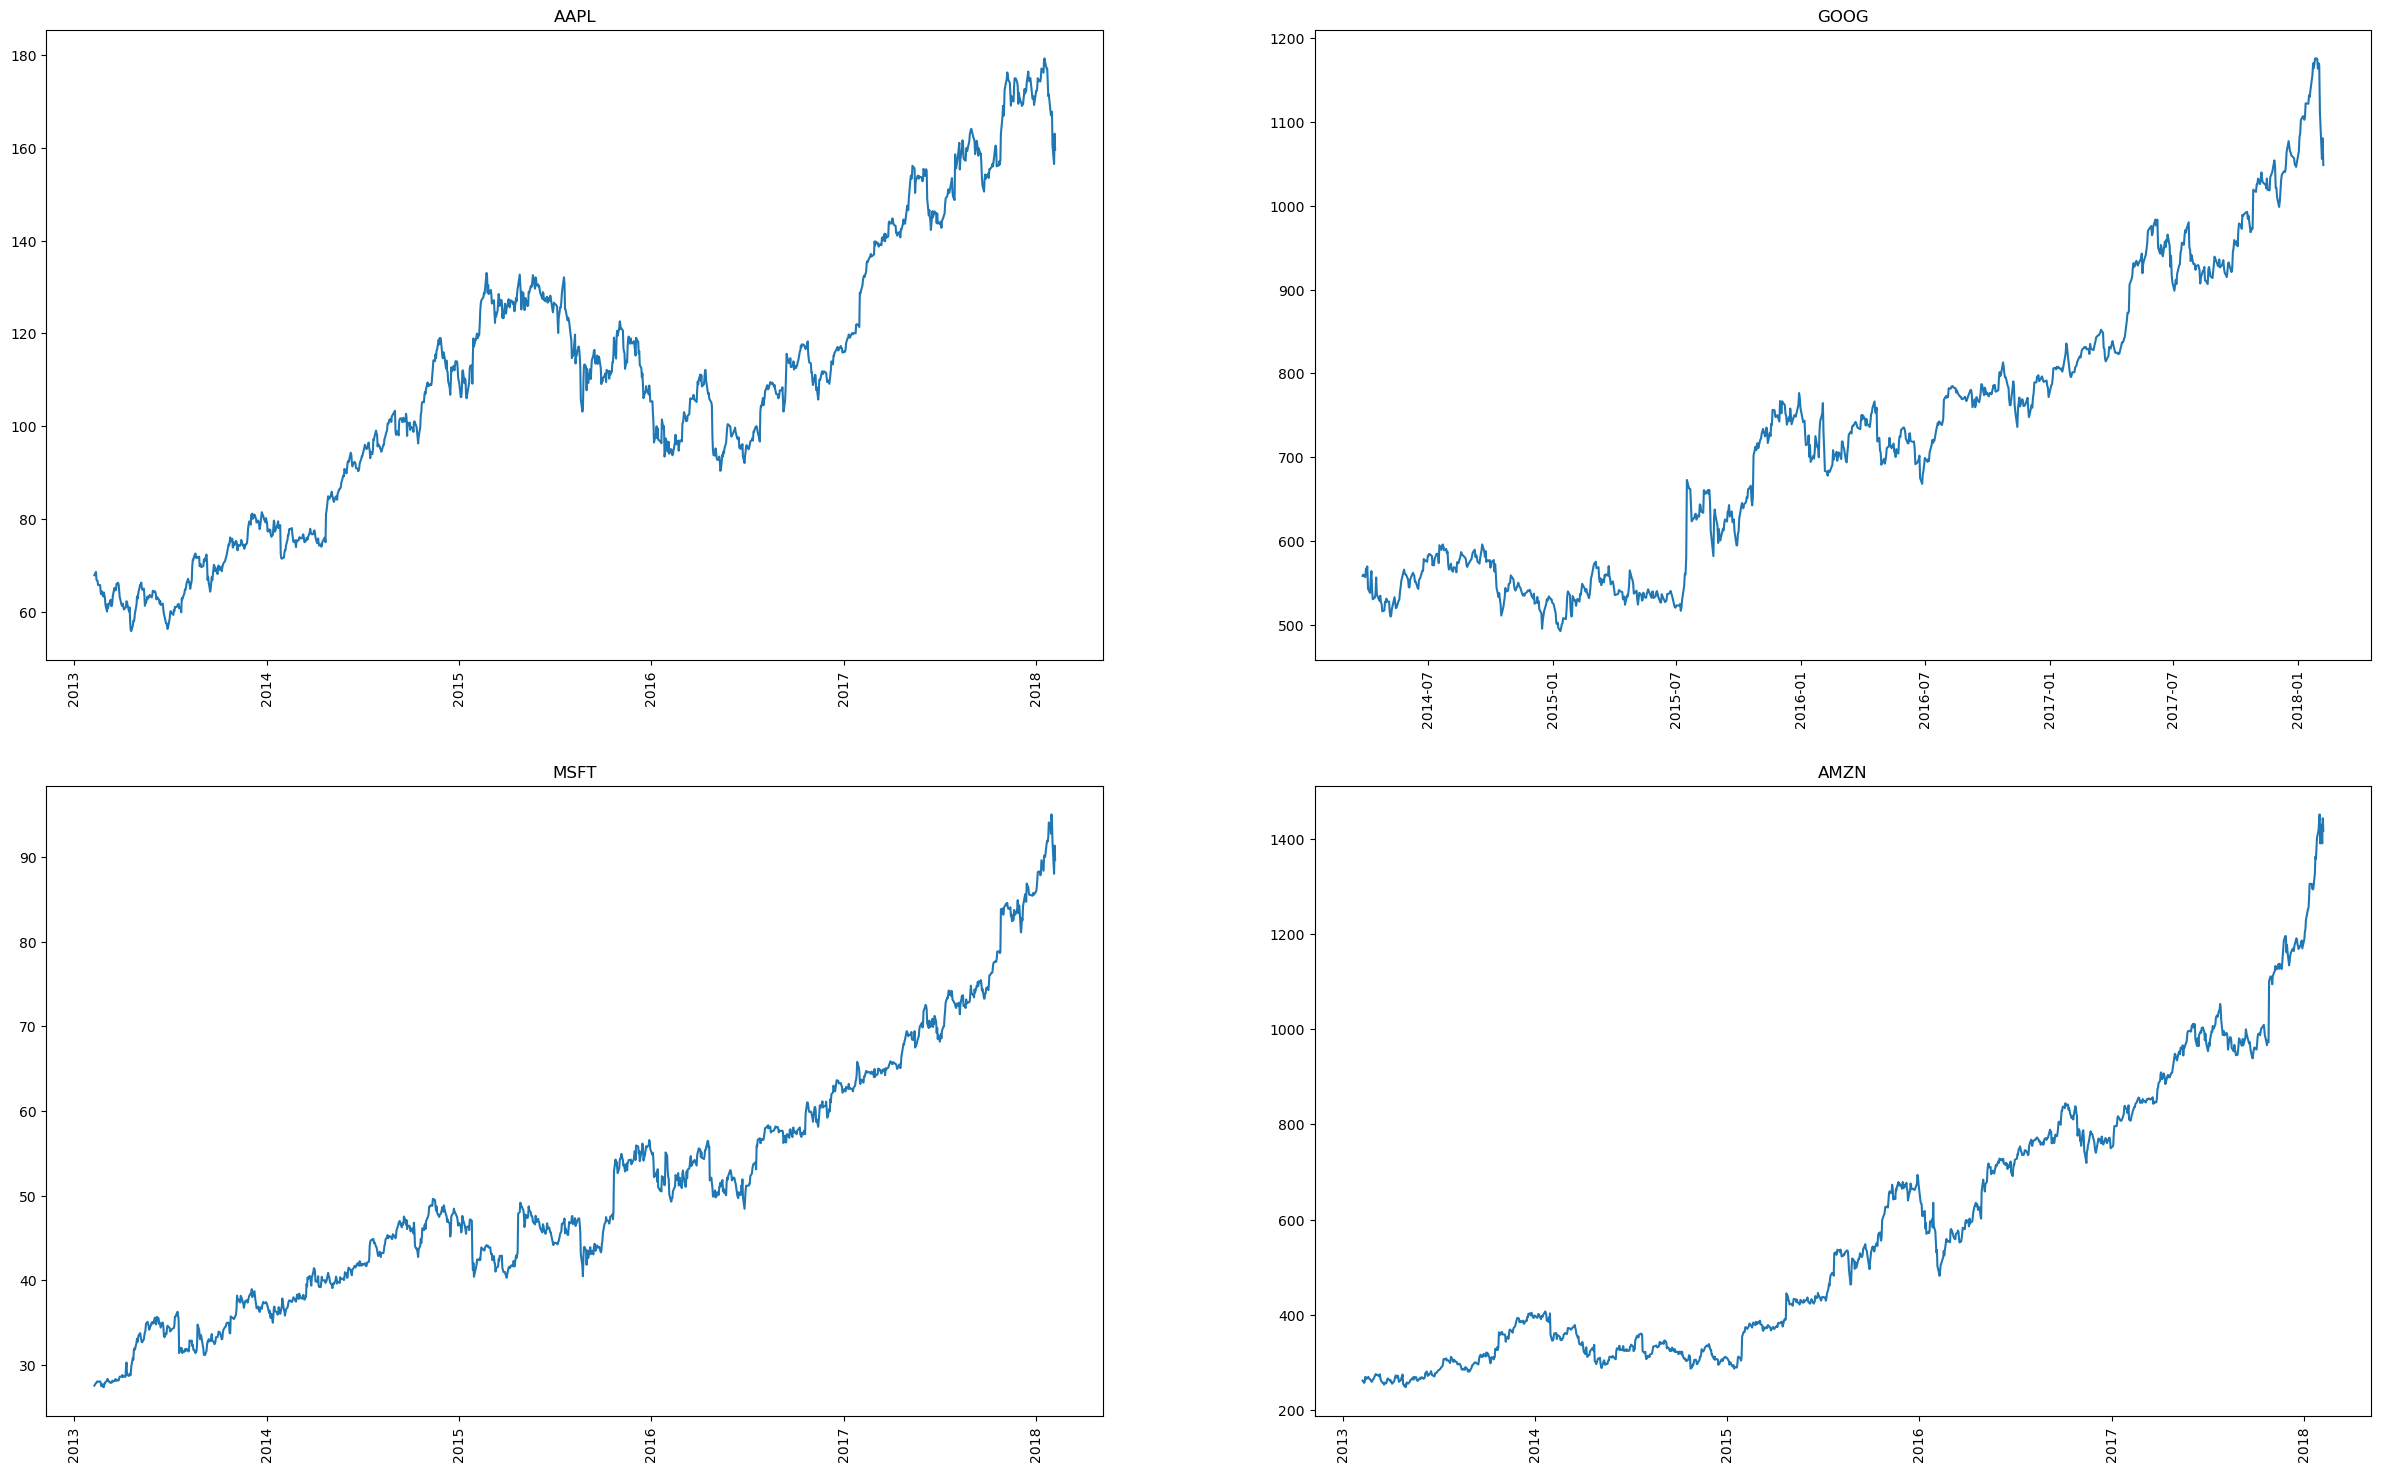

In [9]:
#Closing Price of Stocks for the Datasets of Seleected Companies
plt.figure(figsize=(30,18))
for i,company in enumerate(tech_list,1):
    plt.subplot(2,2,i)
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'],df['close'])
    plt.xticks(rotation='vertical')
    plt.title(company)
    

In [10]:
import plotly.express as px

In [11]:
#Total Volume of Stockes Traded per day
for company in tech_list:
    df=all_data[all_data['Name']==company]
    fig=px.line(df,x='date',y='volume',title=company)
    fig.show()
    

In [12]:
df=pd.read_csv(r'C:\Users\admin\Downloads\Stock Market Analysis\individual_stocks_5yr-20220120T142102Z-001\individual_stocks_5yr\AAPL_data.csv')

In [13]:
df.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [14]:
df['Price_change']=df['close']-df['open']
df.head()

date     open     high      low    close     volume  Name  \
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

   Price_change  
0        0.1400  
1        0.4900  
2       -1.6586  
3       -0.0286  
4        0.2957

In [15]:
#Daily price change & percent return in Stocks
df['Daily % return']=((df['close']-df['open'])/df['close'])*100

In [16]:
df.head()

date     open     high      low    close     volume  Name  \
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

   Price_change  Daily % return  
0        0.1400        0.206325  
1        0.4900        0.714688  
2       -1.6586       -2.481344  
3       -0.0286       -0.042869  
4        0.2957        0.443624

In [17]:

fig=px.line(df,x='date',y='Daily % return',title=company)
fig.show()

In [18]:
df2=df.copy()

In [19]:
df2.dtypes

date               object
open              float64
high              float64
low               float64
close             float64
volume              int64
Name               object
Price_change      float64
Daily % return    float64
dtype: object

In [20]:
df2['date']=pd.to_datetime(df2['date'])
df2.dtypes

date              datetime64[ns]
open                     float64
high                     float64
low                      float64
close                    float64
volume                     int64
Name                      object
Price_change             float64
Daily % return           float64
dtype: object

In [21]:
df2.set_index('date',inplace=True)

In [22]:
df2.head()

open     high      low    close     volume  Name  Price_change  \
date                                                                            
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL        0.1400   
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL        0.4900   
2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL       -1.6586   
2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL       -0.0286   
2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL        0.2957   

            Daily % return  
date                        
2013-02-08        0.206325  
2013-02-11        0.714688  
2013-02-12       -2.481344  
2013-02-13       -0.042869  
2013-02-14        0.443624

<Axes: xlabel='date'>

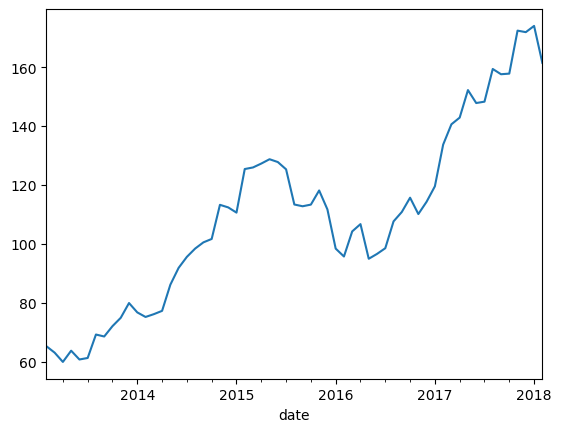

In [23]:
#Analysing monthly mean of closing price

df2['close'].resample('M').mean().plot()

<Axes: xlabel='date'>

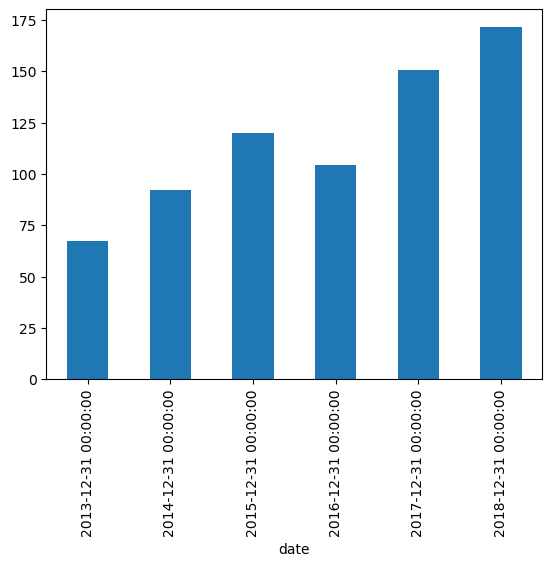

In [24]:
#Analysing yearly mean of closing price
df2['close'].resample('Y').mean().plot(kind='bar')

In [25]:
apl=pd.read_csv(r'C:\Users\admin\Downloads\Stock Market Analysis\individual_stocks_5yr-20220120T142102Z-001\individual_stocks_5yr\AAPL_data.csv')
apl.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [26]:
amz=pd.read_csv(r'C:\Users\admin\Downloads\Stock Market Analysis\individual_stocks_5yr-20220120T142102Z-001\individual_stocks_5yr\AMZN_data.csv')
amz.head()

date    open    high      low   close   volume  Name
0  2013-02-08  261.40  265.25  260.555  261.95  3879078  AMZN
1  2013-02-11  263.20  263.25  256.600  257.21  3403403  AMZN
2  2013-02-12  259.19  260.16  257.000  258.70  2938660  AMZN
3  2013-02-13  261.53  269.96  260.300  269.47  5292996  AMZN
4  2013-02-14  267.37  270.65  265.400  269.24  3462780  AMZN

In [27]:
mic=pd.read_csv(r'C:\Users\admin\Downloads\Stock Market Analysis\individual_stocks_5yr-20220120T142102Z-001\individual_stocks_5yr\MSFT_data.csv')
mic.head()

date   open   high    low  close    volume  Name
0  2013-02-08  27.35  27.71  27.31  27.55  33318306  MSFT
1  2013-02-11  27.65  27.92  27.50  27.86  32247549  MSFT
2  2013-02-12  27.88  28.00  27.75  27.88  35990829  MSFT
3  2013-02-13  27.93  28.11  27.88  28.03  41715530  MSFT
4  2013-02-14  27.92  28.06  27.87  28.04  32663174  MSFT

In [28]:
ggl=pd.read_csv(r'C:\Users\admin\Downloads\Stock Market Analysis\individual_stocks_5yr-20220120T142102Z-001\individual_stocks_5yr\GOOG_data.csv')
ggl.head()

date     open    high     low   close  volume  Name
0  2014-03-27  568.000  568.00  552.92  558.46   13052  GOOG
1  2014-03-28  561.200  566.43  558.67  559.99   41003  GOOG
2  2014-03-31  566.890  567.00  556.93  556.97   10772  GOOG
3  2014-04-01  558.710  568.45  558.71  567.16    7932  GOOG
4  2014-04-02  565.106  604.83  562.19  567.00  146697  GOOG

In [28]:
#Analysis of Closing prices of Amazon,Google,Microsoft,Apple

In [29]:
Close=pd.DataFrame()

In [30]:
Close['apple']=apl['close']
Close['amazon']=amz['close']
Close['microsoft']=mic['close']
Close['google']=ggl['close']

In [31]:
Close.head()

apple  amazon  microsoft  google
0  67.8542  261.95      27.55  558.46
1  68.5614  257.21      27.86  559.99
2  66.8428  258.70      27.88  556.97
3  66.7156  269.47      28.03  567.16
4  66.6556  269.24      28.04  567.00

In [32]:
import seaborn as sns

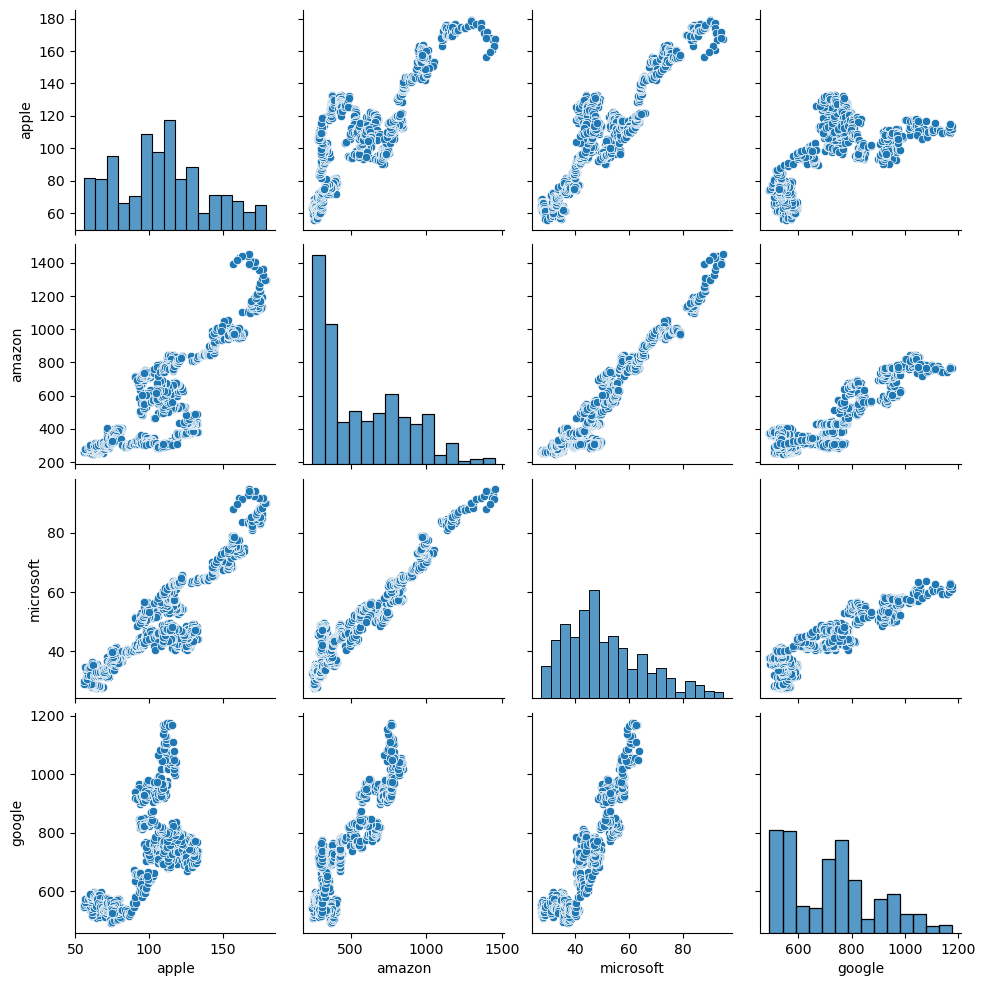

In [33]:
sns.pairplot(data=Close)

<Axes: >

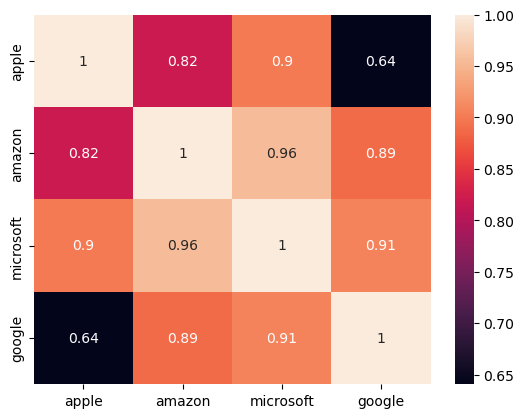

In [34]:
sns.heatmap(Close.corr(),annot=True)

In [35]:
apl.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [36]:
data=pd.DataFrame()

In [37]:
data['Apple Change']=((apl['close']-apl['open'])/apl['close'])*100
data['Google Change']=((ggl['close']-ggl['open'])/ggl['close'])*100
data['Microsoft Change']=((mic['close']-mic['open'])/mic['close'])*100
data['Amazon Change']=((amz['close']-amz['open'])/amz['close'])*100

In [38]:
data.head()

Apple Change  Google Change  Microsoft Change  Amazon Change
0      0.206325      -1.708269          0.725953       0.209964
1      0.714688      -0.216075          0.753769      -2.328836
2     -2.481344      -1.781065          0.000000      -0.189409
3     -0.042869       1.489879          0.356761       2.946525
4      0.443624       0.334039          0.427960       0.694548

<Axes: >

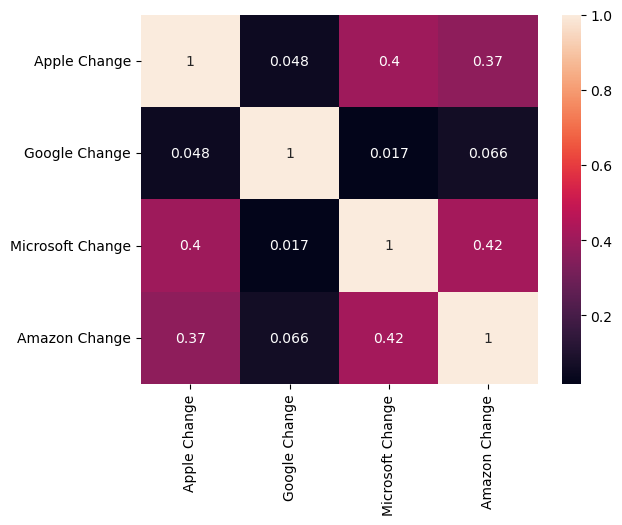

In [39]:
sns.heatmap(data.corr(),annot=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_18908\2570564673.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Google Change', ylabel='Density'>

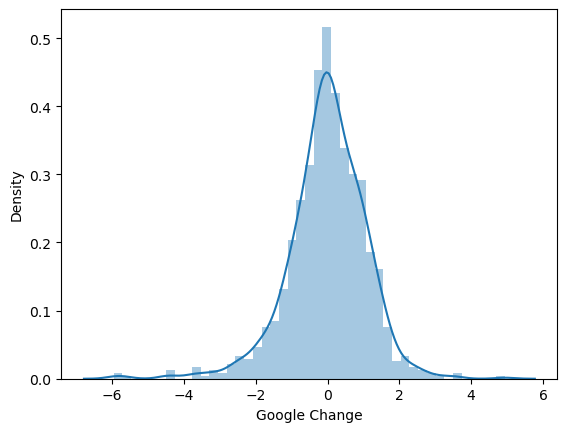

In [40]:
sns.distplot(data['Google Change'])

In [41]:
data['Google Change'].std()
data['Google Change'].std()*2
data['Google Change'].std()*3

3.277678853463143

In [42]:
data.describe().T

count      mean       std       min       25%       50%  \
Apple Change      1259.0 -0.000215  1.187138 -7.104299 -0.658021  0.042230   
Google Change      975.0 -0.012495  1.092560 -5.952266 -0.551963  0.024951   
Microsoft Change  1259.0  0.076404  1.059260 -5.177618 -0.509241  0.061069   
Amazon Change     1259.0 -0.000398  1.358679 -9.363077 -0.738341 -0.002623   

                       75%       max  
Apple Change      0.715427  8.000388  
Google Change     0.672649  4.943550  
Microsoft Change  0.703264  4.861491  
Amazon Change     0.852568  5.640265